# 10-projeto-10-Tranfer-learning-classificar-gatos-e-cachorros

### importação das bibliotecas

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import zipfile

### importação do modelo com os pesos pré treinados

In [2]:
model = tf.keras.applications.ResNet50(weights= 'imagenet')

102973440/102967424 [==============================] - 889s 9us/step


In [3]:
path = 'datasets/Transfer-Learning-Data 1.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('datasets/')
zip_object.close()

In [5]:
sample_img = tf.keras.preprocessing.image.load_img(r'datasets/Transfer Learning Data/bicycle.png', 
                                                   target_size=(224,224))

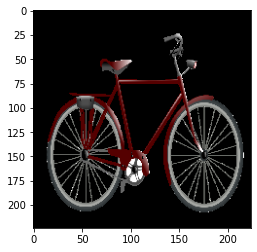

In [7]:
plt.imshow(sample_img);

In [8]:
type(sample_img)

PIL.Image.Image

In [9]:
sample_img = tf.keras.preprocessing.image.img_to_array(sample_img)
type(sample_img)

numpy.ndarray

In [10]:
np.shape(sample_img)

(224, 224, 3)

In [11]:
#convertendo para o valor de batch

sample_img = np.expand_dims(sample_img, axis=0)
sample_img.shape

(1, 224, 224, 3)

In [12]:
np.min(sample_img), np.max(sample_img)

(0.0, 255.0)

In [13]:
#pre processando a imagem para enviar para a resnet
sample_img = tf.keras.applications.resnet50.preprocess_input(sample_img)
np.min(sample_img), np.max(sample_img)

(-123.68, 151.061)

In [16]:
predicition = model.predict(sample_img)
print(f'predictions: {tf.keras.applications.resnet50.decode_predictions(predicition, top=5)}')

predictions: [[('n02835271', 'bicycle-built-for-two', 0.6329612), ('n03792782', 'mountain_bike', 0.05375585), ('n04482393', 'tricycle', 0.049758054), ('n03599486', 'jinrikisha', 0.015690302), ('n04507155', 'umbrella', 0.010513367)]]


In [40]:
def predict_image_resnet50(path_img):
    
    path = fr'{path_img}'
    #carregando a imagem
    sample_img = tf.keras.preprocessing.image.load_img(path, 
                                                   target_size=(224,224))
    img = sample_img.copy()
    #convertendo ela pra array
    sample_img = tf.keras.preprocessing.image.img_to_array(sample_img)
    
    #convertendo para o valor de batch compativel

    sample_img = np.expand_dims(sample_img, axis=0)
    sample_img.shape

    #pre processando a imagem para enviar para a resnet
    sample_img = tf.keras.applications.resnet50.preprocess_input(sample_img)
    np.min(sample_img), np.max(sample_img)
    
    predicition = model.predict(sample_img)
    print(f'predictions: {tf.keras.applications.resnet50.decode_predictions(predicition, top=5)}')
    return(plt.imshow(img))

predictions: [[('n02835271', 'bicycle-built-for-two', 0.6329612), ('n03792782', 'mountain_bike', 0.05375585), ('n04482393', 'tricycle', 0.049758054), ('n03599486', 'jinrikisha', 0.015690302), ('n04507155', 'umbrella', 0.010513367)]]


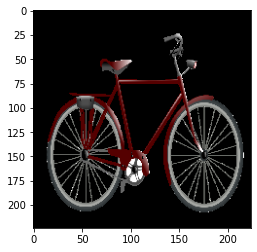

In [41]:

predict_image_resnet50('datasets/Transfer Learning Data/bicycle.png')


predictions: [[('n01871265', 'tusker', 0.6549784), ('n02113799', 'standard_poodle', 0.13240653), ('n02504458', 'African_elephant', 0.09300277), ('n02504013', 'Indian_elephant', 0.07018624), ('n02102973', 'Irish_water_spaniel', 0.024731899)]]


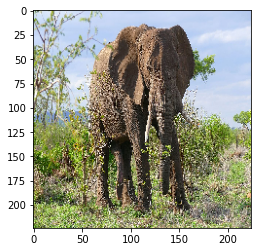

In [42]:
predict_image_resnet50('datasets/Transfer Learning Data/African_Elephant.jpg')


predictions: [[('n02123045', 'tabby', 0.83879507), ('n02123159', 'tiger_cat', 0.08255234), ('n02124075', 'Egyptian_cat', 0.05294355), ('n04589890', 'window_screen', 0.009460859), ('n03958227', 'plastic_bag', 0.001445955)]]


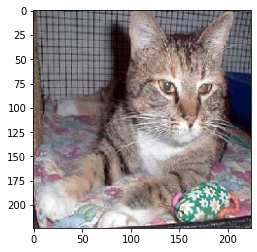

In [43]:
predict_image_resnet50('datasets/Transfer Learning Data/cat.282.jpg')


predictions: [[('n02089078', 'black-and-tan_coonhound', 0.3203152), ('n02107142', 'Doberman', 0.2914504), ('n02106550', 'Rottweiler', 0.09786509), ('n02107908', 'Appenzeller', 0.043424346), ('n02105412', 'kelpie', 0.042281102)]]


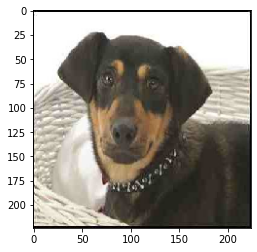

In [46]:

predict_image_resnet50('datasets/Transfer Learning Data/dog.309.jpg')

predictions: [[('n02129165', 'lion', 0.99799216), ('n02480495', 'orangutan', 0.00044723618), ('n02130308', 'cheetah', 0.00021210405), ('n02129604', 'tiger', 0.00018189446), ('n02128925', 'jaguar', 0.00014609988)]]


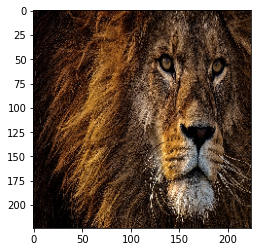

In [47]:

predict_image_resnet50('datasets/Transfer Learning Data/Lion.jpg')

predictions: [[('n04328186', 'stopwatch', 0.99394786), ('n02708093', 'analog_clock', 0.004688473), ('n03197337', 'digital_watch', 0.0007467053), ('n04548280', 'wall_clock', 0.00012209419), ('n02794156', 'barometer', 7.7139375e-05)]]


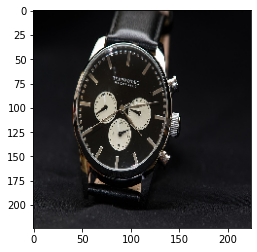

In [48]:

predict_image_resnet50('datasets/Transfer Learning Data/watch.jpg')

### Transfer learning

In [49]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 473s 5us/step


In [50]:
x = base_model.output

x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(2, activation='softmax')(x)

In [53]:
model = tf.keras.models.Model(inputs = base_model.input, outputs = preds)

In [54]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [56]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [57]:
for layer in model.layers[:175]:
    layer.trainable = False
    

In [58]:
for layer in model.layers[175:]:
    layer.trainable = True

In [59]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)


In [60]:
train_generator = train_datagen.flow_from_directory('datasets/Transfer Learning Data/train',
                                                   target_size=(224, 224),
                                                   color_mode='rgb',
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 202 images belonging to 2 classes.


In [61]:
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
history = model.fit_generator(generator=train_generator,
                             epochs=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
7/7 [==============================] - 7s 1s/step - loss: 1.9931 - accuracy: 0.5594
Epoch 2/10
7/7 [==============================] - 7s 1s/step - loss: 0.1591 - accuracy: 0.9802
Epoch 3/10
7/7 [==============================] - 7s 1s/step - loss: 0.2140 - accuracy: 0.9307
Epoch 4/10
7/7 [==============================] - 7s 1s/step - loss: 0.0501 - accuracy: 0.9752
Epoch 5/10
7/7 [==============================] - 7s 1s/step - loss: 0.2239 - accuracy: 0.9703
Epoch 6/10
7/7 [==============================] - 7s 988ms/step - loss: 0.0463 - accuracy: 0.9802
Epoch 7/10
7/7 [==============================] - 7s 991ms/step - loss: 0.0267 - accuracy: 0.9851
Epoch 8/10
7/7 [==============================] - 7s 985ms/step - loss: 0.0229 - accuracy: 0.9851
Epoch 9/10
7/7 [==============================] - 7s 986ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 10/10
7/7 [==============================] - 7s 986

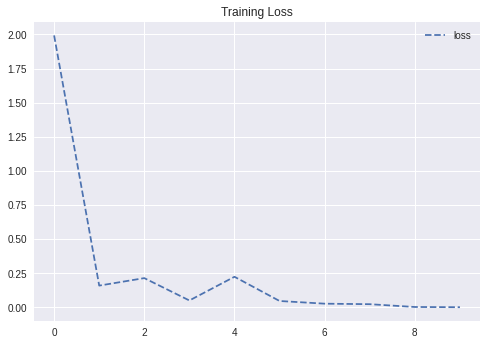

In [64]:
plt.style.use('seaborn')
plt.plot(history.history['loss'],'--', label='loss')
plt.title('Training Loss')
plt.legend()

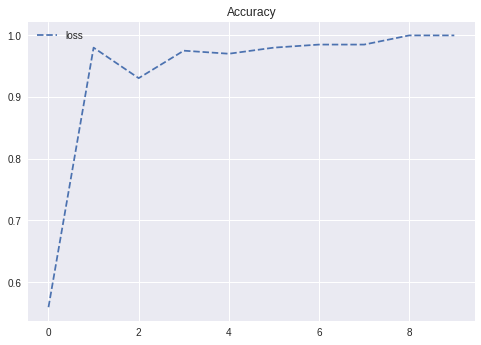

In [66]:

plt.plot(history.history['accuracy'],'--', label='loss')
plt.title('Accuracy')
plt.legend()

In [73]:
sample_img_dog = tf.keras.preprocessing.image.load_img(r'datasets/Transfer Learning Data/dog.309.jpg', 
                                                   target_size=(224,224))

sample_img_cat = tf.keras.preprocessing.image.load_img(r'datasets/Transfer Learning Data/cat.282.jpg',
                                            target_size=(224,224))
              

In [74]:
sample_img_cat = tf.keras.preprocessing.image.img_to_array(sample_img_cat)

#convertendo para o valor de batch compativel

sample_img_cat = np.expand_dims(sample_img_cat, axis=0)
sample_img_cat.shape



(1, 224, 224, 3)

In [75]:
#pre processando a imagem para enviar para a resnet
sample_img_cat = tf.keras.applications.resnet50.preprocess_input(sample_img_cat)
np.min(sample_img_cat), np.max(sample_img)

(-123.68, 151.061)

In [76]:
predicition = model.predict(sample_img_cat)
print(predicition)

[[1.0000000e+00 3.0188246e-12]]


In [77]:
sample_img_dog = tf.keras.preprocessing.image.img_to_array(sample_img_dog)

#convertendo para o valor de batch compativel

sample_img_dog = np.expand_dims(sample_img_dog, axis=0)
sample_img_dog.shape



(1, 224, 224, 3)

In [78]:
#pre processando a imagem para enviar para a resnet
sample_img_dog = tf.keras.applications.resnet50.preprocess_input(sample_img_dog)
np.min(sample_img_dog), np.max(sample_img)

(-123.68, 151.061)

In [79]:
predicition = model.predict(sample_img_dog)
print(predicition)

[[1.6549089e-05 9.9998343e-01]]
